## NLP - Assignment 2

---

### Question 1-2:

We take the data form the given corpus and use the NLTK sentence tokeniser.

In [2]:
import string
import random
import nltk
from nltk.corpus import reuters
from nltk import FreqDist
from nltk.corpus import stopwords

In [3]:
from nltk.corpus import stopwords
import random
from sklearn.model_selection import train_test_split
import math

In [4]:
import pandas as pd
df=pd.read_csv("preprocessed_data.csv")

In [5]:
df

,Unnamed: 0.1,Unnamed: 0,Post_ID,Comment_ID,Comment,Majority_Sentiment,lemmatized_comments
0,0,1,108l3ho,j3vlnat,Some of them yes but this one i got it from my...,Neutral,some of them yes but this one i got it from my...
1,1,2,10j6oqj,j5j34zb,I keep mine in my phone cover for good luck,Positive,i keep mine in my phone cover for good luck
2,2,3,10j6oqj,j5jbs3f,Hang on to it These are rare to come by as the...,Neutral,hang on to it these are rare to come by a the...
3,3,4,10j6oqj,j5jfczd,Yeah Cool I got this from my classmate in 2015...,Positive,yeah cool i got this from my classmate in 2...
4,4,5,10o9tvi,j6h1ko8,Check out the Kaja Throm Beautiful marketplace...,Positive,check out the kaja throm beautiful marketplac...
...,...,...,...,...,...,...,...
130611,130611,166838,zp46e8,0,Our population growth rate is 19 Our Birth rat...,Neutral,our population growth rate is 19 our birth ra...
130612,130612,166839,zp46e8,0,I obviously wont But not only you dont do bes...,Negative,i obviously wo nt but not only you do nt do ...
130613,130613,166840,zp46e8,0,bengal has always been some of the most fertil...,Positive,bengal ha always been some of the most fertile...
130614,130614,166841,zp46e8,0,racist agenda\n\nAhhh yes its always racism\n\...,Negative,racist agenda ahhh yes it s always racism t...


In [6]:
proc_sents=[sentence for sentence in df.loc[:,"lemmatized_comments"]]

In [7]:
for sen in proc_sents:
    if 'http' in sen:
        proc_sents.remove(sen)

In [8]:
proc_sents[0:2]

['some of them yes but this one i got it from my brother who studied in malaysia and he made a friend from bhutan there and he found it for me',
 'i keep mine in my phone cover for good luck']

In [9]:
for i in range(len(proc_sents)):
    sentence=proc_sents[i]
    proc_sents[i]=sentence.split()

In [10]:
proc_sents[0:2]

[['some',
  'of',
  'them',
  'yes',
  'but',
  'this',
  'one',
  'i',
  'got',
  'it',
  'from',
  'my',
  'brother',
  'who',
  'studied',
  'in',
  'malaysia',
  'and',
  'he',
  'made',
  'a',
  'friend',
  'from',
  'bhutan',
  'there',
  'and',
  'he',
  'found',
  'it',
  'for',
  'me'],
 ['i', 'keep', 'mine', 'in', 'my', 'phone', 'cover', 'for', 'good', 'luck']]

---

### Question 3:

Here, we make a 80-20 split of the data into training and test data.

In [11]:
import numpy as np
np.random.seed(0)
train_set, validation_set = train_test_split(proc_sents, test_size=0.2)

---
### Question 4:

Here we are training the Language model on the test data. The training part mainly includes parsing through the corpus and calculating the number of word tuples (single tuples for unigram, two tuples for bigrams and so on). These tuple counts are saved in the dictionaries unigrams, bigrams, trigrams, quadragms.

In [12]:
# Total number of unique words in the corpus
word_to_int = {}
count = 0
for sentence in train_set:
    for token in sentence:
        if(token not in word_to_int): 
            word_to_int[token] = count
            count += 1

In [13]:
# Dictionaries containing the count of each n-gram
unigrams = {}
bigrams = {}
trigrams = {}
quadgrams = {}

In [14]:
for sentence in train_set:
    for token in sentence:
        if(token not in unigrams): unigrams[token] = 0
        unigrams[token] += 1

In [32]:
# word_to_int 
print({k: word_to_int[k] for k in list(word_to_int)[:3]})

{'since': 0, 'you': 1, 'are': 2}


In [16]:
for sentence in train_set:
    for i in range(3 , len(sentence)):
        quadgram = (sentence[i-3] , sentence[i-2] , sentence[i-1], sentence[i])
        if(quadgram not in quadgrams): quadgrams[quadgram] = 0
        quadgrams[quadgram] += 1

In [17]:
for sentence in train_set:
    for i in range(2 , len(sentence)):
        trigram = (sentence[i-2] , sentence[i-1], sentence[i])
        if(trigram not in trigrams): trigrams[trigram] = 0
        trigrams[trigram] += 1

In [18]:
for sentence in train_set:
    for i in range(1 , len(sentence)):
        bigram = (sentence[i-1], sentence[i])
        if(bigram not in bigrams): bigrams[bigram] = 0
        bigrams[bigram] += 1

#### Here we can see some examples of the counts of word tuples

In [19]:
# unigrams
print({k: unigrams[k] for k in list(unigrams)[:3]})

{'since': 1979, 'you': 52791, 'are': 32857}


In [20]:
# bigrams
print({k: bigrams[k] for k in list(bigrams)[:3]})

{('since', 'you'): 134, ('you', 'are'): 3861, ('are', 'bringing'): 17}


In [21]:
# trigrams
print({k: trigrams[k] for k in list(trigrams)[:3]})

{('since', 'you', 'are'): 18, ('you', 'are', 'bringing'): 7, ('are', 'bringing', 'up'): 4}


In [22]:
# quadgrams
print({k: quadgrams[k] for k in list(quadgrams)[:3]})

{('since', 'you', 'are', 'bringing'): 1, ('you', 'are', 'bringing', 'up'): 3, ('are', 'bringing', 'up', 'different'): 1}


---
### Question 5:

Calculating the perplexity score of the various models on the test data. (Unigram/Bigram/Trigram/Quadragram)

We know the formula for perplexity of a sentence in an ngram model is:

\begin{align}
PP(W) &= \sqrt[N]{\frac{1}{P(w_1,w_2,w_3,...,w_N)}} \\
& \sim \sqrt[N]{\frac{1}{\prod_{i=1}^{N}P(w_i|w_1,w_2,...,w_{i-1})}} \\
\end{align}

where N is the number of words in the sentence and P is the probability of the sentence. Here we use the Markov approximation to change the probability of the sentence to the product of the probabilities of the words only for a fix n words behind it. n being the order of the ngram model.

The way we get the probabilites is:

\begin{align}
P(w_i|w_1,w_2,...,w_{i-1}) &= \frac{P(w_1,w_2,...,w_{i-1},w_i)}{P(w_1,w_2,...,w_{i-1})} \\
&= \frac{C(w_1,w_2,...,w_{i-1},w_i)}{C(w_1,w_2,...,w_{i-1})} \\
\end{align}

where C is the count of the word tuple in the corpus.

So this example for the bigram would be:

\begin{align}
P(w_{i}|w_{i-1}) =  \frac{C(w_{i-1},w_i)}{C(w_{i-1})} \\
\end{align}

> Our solution for the problem of tuples not in the corpus:

For the direct case, when we do have either the numerator $C(w_{i}, w_{i-1})$ or $C(w_{i-1})$ as zero in the corpus due to the tuple being missing, we replace the probability with some other expected value.

In this implementation, we estimated the value of probability for the missing tuples case by the **inverse of the vocabulary size.**. 

The reason for this being that perplexity tries to measure the uncertainity in predicting the next word of a sentence, and its value corresponds to how many words from the corpus it is equally confused from. Hense if a said tuple is not present in the training data, then the model will be equally confused between all the words in the vocabulary, when trying to predict the next word. 

Thus $$P(w_i|w_1,w_2,...,w_{i-1}) = \frac{1}{V}$$

where V is the vocabulary size, if the tuple ${w_i, w_{i-1}, ... }$ is not present in the training data.

> Our solution for numerical stability:

We know that the probability of a sentence is the product of the probabilities of the words in the sentence. But the problem with this is that the product of many small numbers can be very small and can cause numerical instability. 

So we take the log of the probabilities and add them instead of multiplying them. This is equivalent to multiplying the probabilities, and gives the correct values instead of infinities.



In [39]:
len(unigrams)

72406

In [77]:
## Unigrams
total_sum = sum(unigrams.values())
total_perp = 0
count_sent = 0

for sentence in validation_set:

    count_sent += 1
    if(len(sentence) < 1): continue
    else:
        perp = 1
        n = len(sentence)
        log_perp = 0
        for i in range(0 , n):
            n_gram = sentence[i]

            if(n_gram not in unigrams) :
                log_perp += math.log(total_sum)

            else:
                log_perp += math.log(total_sum/unigrams[n_gram])
        log_perp = (1/n)*log_perp
        total_perp += math.exp(log_perp)
Unigram_perplexity = total_perp / count_sent
print("average perplexity of unigram is: ",total_perp / count_sent)

average perplexity of unigram is:  8864.404692934333


In [43]:
## Bigrams
total_perp = 0
count_sent = 0

for sentence in validation_set:
    
    count_sent += 1
    if(len(sentence) < 2): continue
    else:
        perp = 1
        n = len(sentence)
        log_perp = 0
        for i in range(1 , n):
            n_gram = (sentence[i-1], sentence[i])
            
            if(n_gram[0] not in unigrams) or (n_gram not in bigrams):
                log_perp += math.log(len(unigrams))
                
            else:
                log_perp += math.log(unigrams[n_gram[0]]/(bigrams[n_gram]))
        log_perp = (1/n)*log_perp
        total_perp += math.exp(log_perp)
Bigram_perplexity = total_perp / count_sent
print("average perplexity of bigram is: ",total_perp / count_sent)

average perplexity of bigram is:  592.2785718972964


In [44]:
## Trigram
total_perp = 0
count_sent = 0

for sentence in validation_set:
    count_sent += 1
    if(len(sentence) < 3): continue
    else:
        n = len(sentence)
        log_perp = 0
        for i in range(2 , n):
            n_gram = (sentence[i-2], sentence[i-1], sentence[i])
            
            if(n_gram[:-1] not in bigrams) or (n_gram not in trigrams):
                log_perp += math.log(len(unigrams))

            else:
                log_perp += math.log(bigrams[n_gram[:-1]]/(trigrams[n_gram]))
        log_perp = (1/n)*log_perp
        total_perp += math.exp(log_perp)
Trigram_perplexity = total_perp / count_sent
print("average perplexity of trigram is: ",total_perp / count_sent)

average perplexity of trigram is:  1973.644316192001


In [45]:
## Quadgram
total_perp = 0
count_sent = 0

for sentence in validation_set:
    count_sent += 1
    if(len(sentence) < 4): continue
    else:
        n = len(sentence)
        log_perp = 0
        for i in range(3 , n):
            n_gram = (sentence[i-3], sentence[i-2], sentence[i-1], sentence[i])
            
            if(n_gram[:-1] not in trigrams) or (n_gram not in quadgrams):
                log_perp += math.log(len(unigrams))

            else:
                log_perp += math.log(trigrams[n_gram[:-1]]/(quadgrams[n_gram]))
        log_perp = (1/n)*log_perp
        total_perp += math.exp(log_perp)
Quadgram_perplexity = total_perp / count_sent
print("average perplexity of quadgram is: ",total_perp / count_sent)

average perplexity of quadgram is:  6130.475783783798


----
### Question 6:

Here we use the method of laplace smoothign to smooth the probabilities of the tuples. This is done by adding 1 to the count of each tuple. This is done to avoid the problem of zero probabilities.

The formula for the probability of a tuple after laplace smoothing is:

\begin{align}
P(w_i|w_1,w_2,...,w_{i-1}) &= \frac{C(w_1,w_2,...,w_{i-1},w_i) + 1}{C(w_1,w_2,...,w_{i-1}) + V} \\
\end{align}

where V is the vocabulary size.

Here we apply the laplace smoothing method to all the previous models.


In [79]:
## Unigram Laplace smoothing

total_perp = 0
count_sent = 0

for sentence in validation_set:
    
    count_sent += 1
    if(len(sentence) < 1): continue
    else:
        perp = 1
        n = len(sentence)
        log_perp = 0
        for i in range(0 , n):
            n_gram = (sentence[i])
            
            smooth_prob = (total_sum + len(unigrams))/(unigrams.get(n_gram,0)+1)
            log_perp += math.log(smooth_prob)

        log_perp = (1/n)*log_perp

        total_perp += math.exp(log_perp)
Unigram_lperplexity = total_perp / count_sent
print("average perplexity of Laplace smoothened Unigram is: ",total_perp / count_sent)

average perplexity of Laplace smoothened Unigram is:  8062.611187379733


In [80]:
## Bigram Laplace smoothing

total_perp = 0
count_sent = 0

for sentence in validation_set:
    
    count_sent += 1
    if(len(sentence) < 2): continue
    else:
        perp = 1
        n = len(sentence)
        log_perp = 0
        for i in range(1 , n):
            n_gram = (sentence[i-1], sentence[i])
            
            smooth_prob = (unigrams.get(n_gram[0],0) + len(unigrams))/(bigrams.get(n_gram,0)+1)
            log_perp += math.log(smooth_prob)

        log_perp = (1/n)*log_perp

        total_perp += math.exp(log_perp)
Bigram_lperplexity = total_perp / count_sent
print("average perplexity of Laplace smoothened bigram is: ",total_perp / count_sent)

average perplexity of Laplace smoothened bigram is:  2950.6115686115413


In [81]:
## Trigram Laplace SMOOTHING

total_perp = 0
count_sent = 0

for sentence in validation_set:
    
    count_sent += 1
    if(len(sentence) < 3): continue
    else:
        n = len(sentence)
        log_perp = 0
        for i in range(2 , n):
            n_gram = (sentence[i-2], sentence[i-1], sentence[i])
            
            smooth_prob = (bigrams.get(n_gram[:-1],0) + len(unigrams))/(trigrams.get(n_gram,0)+1)
            log_perp += math.log(smooth_prob)

        log_perp = (1/n)*log_perp

        total_perp += math.exp(log_perp)
Trigram_lperplexity = total_perp / count_sent
print("average perplexity of Laplace smoothened trigram is: ",total_perp / count_sent)

average perplexity of Laplace smoothened trigram is:  10617.441382254596


In [82]:
## Quadgram LAPLAACE SMOOTHING

total_perp = 0
count_sent = 0

for sentence in validation_set:
    
    count_sent += 1
    if(len(sentence) < 4): continue
    else:
        n = len(sentence)
        log_perp = 0
        for i in range(3 , n):
            n_gram = (sentence[i-3], sentence[i-2], sentence[i-1], sentence[i])
            
            smooth_prob = (trigrams.get(n_gram[:-1],0) + len(unigrams))/(quadgrams.get(n_gram,0)+1)
            log_perp += math.log(smooth_prob)

        log_perp = (1/n)*log_perp

        total_perp += math.exp(log_perp)
Quadgram_lperplexity = total_perp / count_sent
print("average perplexity of Laplace smoothened quadgram is: ",total_perp / count_sent)

average perplexity of Laplace smoothened quadgram is:  13924.504467870463


---

### Question 7:

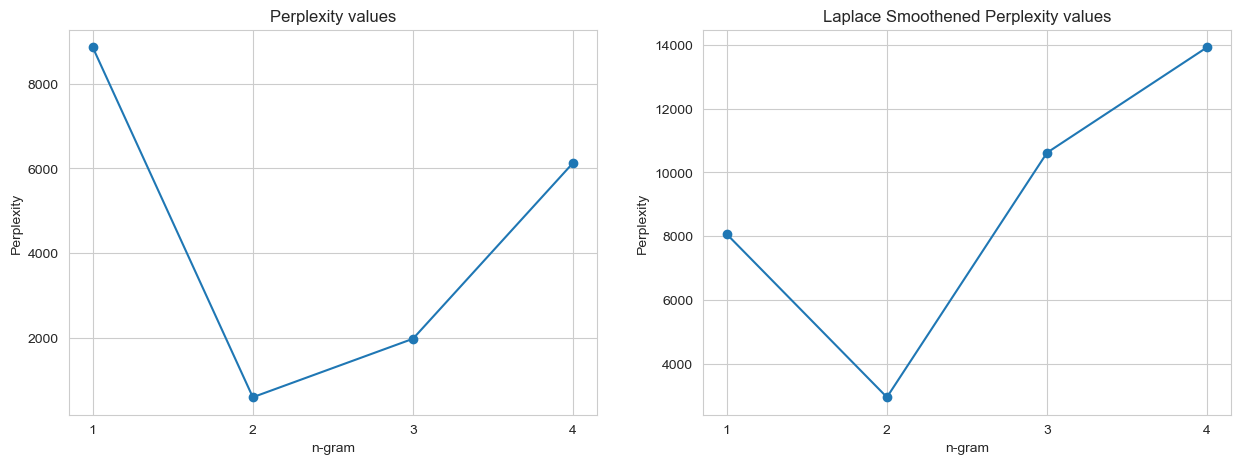

In [86]:
# Plotting the perplexity values
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

nvalues = [1,2,3,4]
names = ['Unigram', 'Bigram', 'Trigram', 'Quadgram']
values = [Unigram_perplexity, Bigram_perplexity, Trigram_perplexity, Quadgram_perplexity]
lvalues = [Unigram_lperplexity, Bigram_lperplexity, Trigram_lperplexity, Quadgram_lperplexity]

# Plotting 2 plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(nvalues, values, "o-")
ax1.set_title('Perplexity values')
ax1.set_xlabel('n-gram')
ax1.set_ylabel('Perplexity')
ax1.set_xticks(nvalues)

ax2.plot(nvalues, lvalues, "o-")
ax2.set_title('Laplace Smoothened Perplexity values')
ax2.set_xlabel('n-gram')
ax2.set_ylabel('Perplexity')
ax2.set_xticks(nvalues)

plt.show()

#### Conclusions and observations.

We can make two important conclusions:-

* For both models, the perplexity value decreases with increase in model size from 1 to 2, but then it again increases after 2

* The perplexity of the laplace model is higher than the unsmoothed model.

The perplexity value for the unigram model is much higher than the bigram model. This is because the unigram model does not take into account the context of the word, and thus the probability of the word is not dependent on the previous word. This is not the case for the bigram model, where the probability of the word is dependent on the previous word. Thus the bigram model is able to predict the next word better than the unigram model.

But, the perplexity of models further increases instead of decreasing according to the logic. This happens as the model size increases to three and four, the combinations of tuples increases exponentially, and there are many combinations in the test data that are not present in the training data. We give these combination a very low probability and thus more and more misses leads to a higher perplexity value.

For example, here you can see that so many of the tuples in the quadgram models are not present in the training data. (And their low probability increases the value of perplexity)


In [91]:
## Quadgram
total_perp = 0
count_sent = 0

for sentence in validation_set[0:2]:
    print(sentence)
    count_sent += 1
    if(len(sentence) < 4): continue
    else:
        n = len(sentence)
        log_perp = 0
        for i in range(3 , n):
            n_gram = (sentence[i-3], sentence[i-2], sentence[i-1], sentence[i])
            
            if(n_gram[:-1] not in trigrams) or (n_gram not in quadgrams):
                log_perp += math.log(len(unigrams))
                print("NOT in quadgram", n_gram, len(unigrams) )

            else:
                log_perp += math.log(trigrams[n_gram[:-1]]/(quadgrams[n_gram]))
                print("in quadgram", n_gram, trigrams[n_gram[:-1]]/(quadgrams[n_gram]))
        log_perp = (1/n)*log_perp
        total_perp += math.exp(log_perp)
Quadgram_perplexity = total_perp / count_sent
print("average perplexity of quadgram is: ",total_perp / count_sent)

['you', 'sound', 'very', 'keen', 'on', 'our', 'being', 'blown', 'away']
NOT in quadgram ('you', 'sound', 'very', 'keen') 72406
NOT in quadgram ('sound', 'very', 'keen', 'on') 72406
NOT in quadgram ('very', 'keen', 'on', 'our') 72406
NOT in quadgram ('keen', 'on', 'our', 'being') 72406
NOT in quadgram ('on', 'our', 'being', 'blown') 72406
NOT in quadgram ('our', 'being', 'blown', 'away') 72406
['such', 'kind', 'of', 'ppl', 'everywhere', 'even', 'in', 'usuk']
in quadgram ('such', 'kind', 'of', 'ppl') 5.0
in quadgram ('kind', 'of', 'ppl', 'everywhere') 1.0
in quadgram ('of', 'ppl', 'everywhere', 'even') 1.0
in quadgram ('ppl', 'everywhere', 'even', 'in') 1.0
in quadgram ('everywhere', 'even', 'in', 'usuk') 4.0
average perplexity of quadgram is:  869.3268742817878


* The perplexity of the laplace model is higher than the unsmoothed model.

Laplace smoothing increases the value of the perplexity as probability of each tuple is decreases, we add V to the denomintor for each probability. Thus the probability of the sentence decreases and the perplexity increases.